---
#CHURN: The Employee Turnover Conundrum
###*Developing a strategic plan for retention*


---
---

   Discovering the underlying issues
   >Pattern identification using:

    *   Decision Trees
    *   Random Forests


Details as of import 2/26/2024
---
---
**(cleaned data github.com/MelAGndy/master/blob/master/churn/employee_stats)*
# *   14,999 Employees sampled
>Salary rates:
>>*   low:  7,316
>>*   medium:  6,446
>>*   high:  1,237
>Job descriptions:
>>*   Accounting:  767
>>*   HR:  739
>>*   Marketing:  858
>>*   Management:  630
>>*   Product Manager:  902
>>*   R&D:  787
>>*   Sales:  4,140
>>*   Support:  2,229
>>*   Technical:  2,720

# Imports

In [65]:
# @title
!pip install pandas-profiling
#[notebook]
# !jupyter nbextension enable --py widgetsnbextension

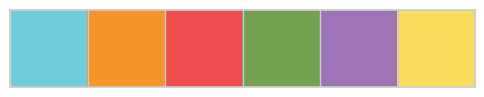

In [66]:
# @title
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
#import pandas_profiling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

import matplotlib.patches as mpatches

from matplotlib.colors import ListedColormap

kats_palette = ListedColormap(['#70ccdc', '#f59228', '#ee4d4d','#74a14f','#9e73b8','#f9dc5c'])
import seaborn as sns
#html color codes
kats = ['#70ccdc', '#f59228', '#ee4d4d','#74a14f','#9e73b8','#f9dc5c']
sns.palplot(sns.color_palette(kats))


warnings.simplefilter("ignore")
%matplotlib inline

In [67]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# @title
employee_eval = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn_ Desicion_Tree_Random_Forest/employee_stats.csv')

In [70]:
# @title
# Define a dictionary mapping salary categories to colors
salary_colors = {
    'low': kats[2],   # Assigning color for 'low' salary
    'medium': kats[1],# Assigning color for 'medium' salary
    'high': kats[0]   # Assigning color for 'high' salary
}

In [71]:
# @title
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,Sales,low
1,0.80,0.86,5,262,6,0,1,0,Sales,medium
2,0.11,0.88,7,272,4,0,1,0,Sales,medium
3,0.72,0.87,5,223,5,0,1,0,Sales,low
4,0.37,0.52,2,159,3,0,1,0,Sales,low


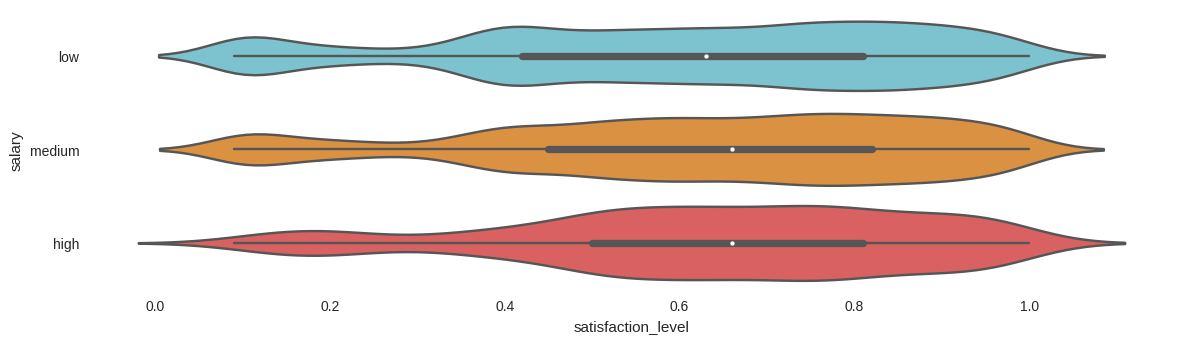

In [72]:
#@title salary vs satisfaction_level
figsize = (12, 1.2 * len(employee_eval['salary'].unique()))
plt.figure(figsize=figsize)

# # Use the custom color palette directly in the violinplot function
sns.violinplot(employee_eval, x='satisfaction_level', y='salary', inner='box', palette=kats)
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

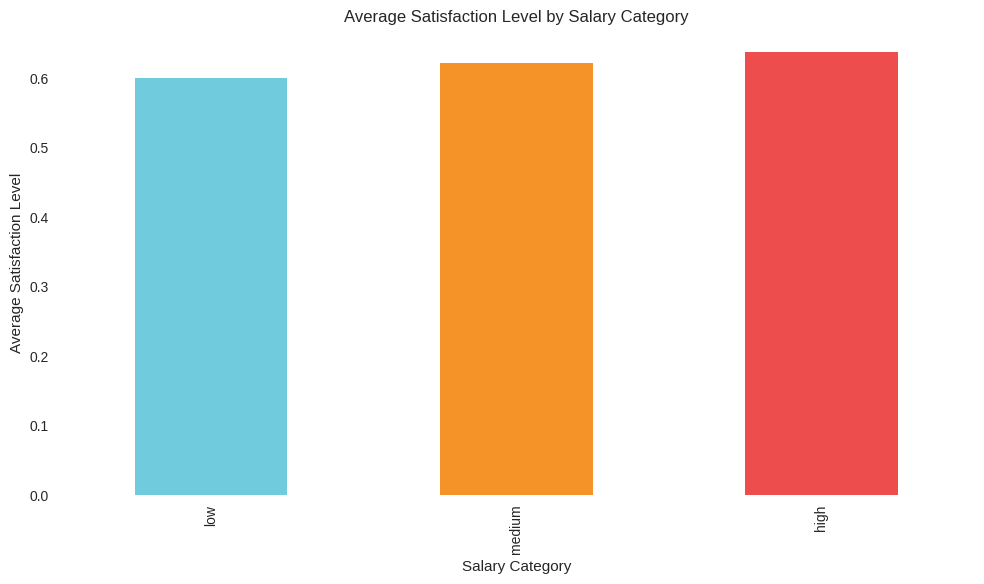

In [73]:
# @title
# Define the order of salary categories and corresponding colors
salary_order = ['low', 'medium', 'high']
colors = ['#70ccdc', '#f59228', '#ee4d4d']  # Assuming 'low', 'medium', 'high' respectively

# Calculate the average satisfaction level for each salary category
avg_satisfaction = employee_eval.groupby('salary')['satisfaction_level'].mean().loc[salary_order]

# Plot the bar graph with the specified order and colors
plt.figure(figsize=(10, 6))
avg_satisfaction.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Salary Category')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level by Salary Category')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

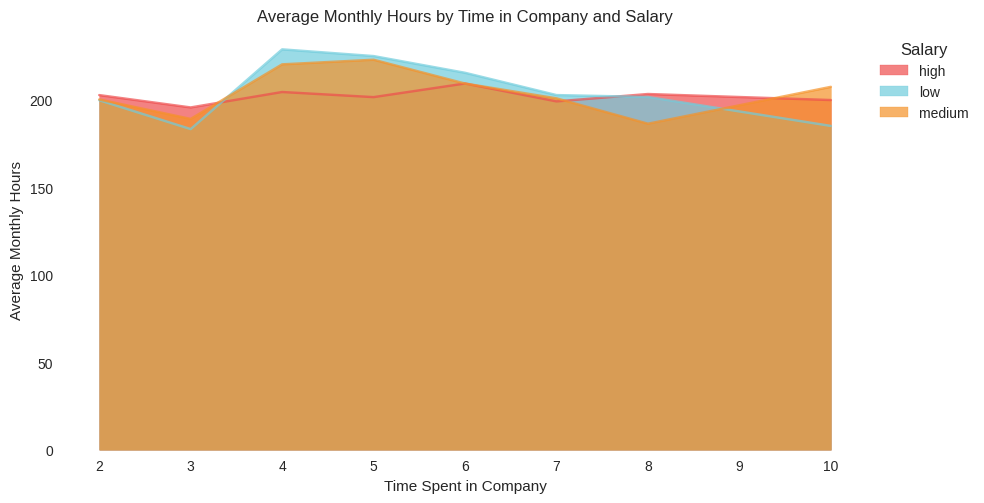

In [74]:
# @title
# Define salary categories corresponding colors
colors = ['#ee4d4d','#70ccdc', '#f59228', ]  # after inspection 'high' ,'low', 'medium'
# Stacked area chart
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Plot the stacked area chart using specified colors
df_grouped.plot(kind='area', ax=ax, stacked=False, alpha=0.7, color=colors)

# Add legend outside the plot
ax.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Set axis labels and title
ax.set_xlabel('Time Spent in Company')
ax.set_ylabel('Average Monthly Hours')
ax.set_title('Average Monthly Hours by Time in Company and Salary')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

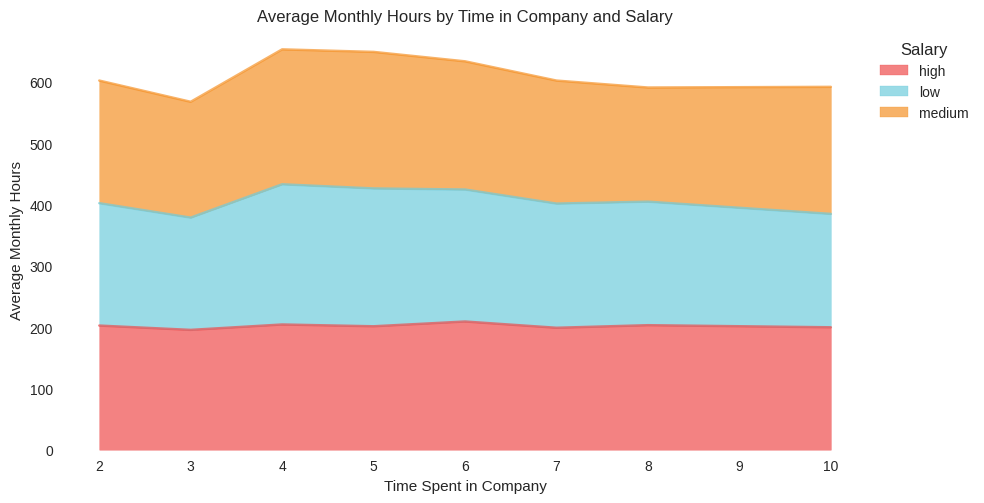

In [75]:
# @title
# Define salary categories corresponding colors
colors = ['#ee4d4d','#70ccdc', '#f59228', ]  # after inspection 'high' ,'low', 'medium'
# Stacked area chart
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Plot the stacked area chart using specified colors
df_grouped.plot(kind='area', ax=ax, stacked=True, alpha=0.7, color=colors)

# Add legend outside the plot
ax.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Set axis labels and title
ax.set_xlabel('Time Spent in Company')
ax.set_ylabel('Average Monthly Hours')
ax.set_title('Average Monthly Hours by Time in Company and Salary')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

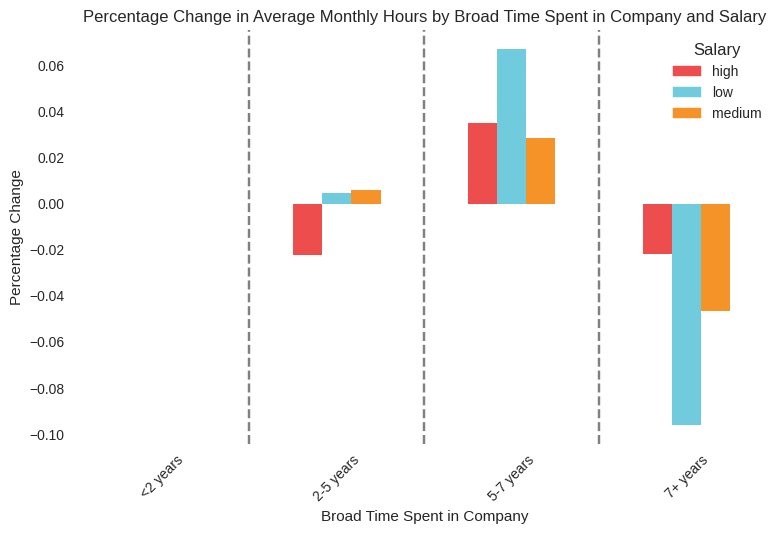

In [76]:
# @title
#Group Data by Broad Time Spent Categories
employee_eval['broad_time_spent'] = pd.cut(employee_eval['time_spend_company'], bins=[0, 2, 5, 7, np.inf], labels=['<2 years', '2-5 years', '5-7 years', '7+ years'])
grouped_data = employee_eval.groupby(['broad_time_spent', 'salary'])

# Calculate Average Monthly Hours
average_hours = grouped_data['average_montly_hours'].mean()

# Compute Percentage Change
percentage_change = average_hours.unstack().pct_change()

# Plot the percentage change with assigned colors
plt.figure(figsize=(8, 4))  # Adjusted size of the plot
ax = percentage_change.plot(kind='bar', color=colors)

# Add vertical gridlines to separate time spent columns
for i in range(1, len(percentage_change)):
    ax.axvline(x=i - 0.5, color='gray', linestyle='--')

plt.title('Percentage Change in Average Monthly Hours by Broad Time Spent in Company and Salary')
plt.xlabel('Broad Time Spent in Company')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Create custom legend handles with corresponding colors
legend_handles = [
    mpatches.Patch(color=color, label=label) for color, label in zip(colors, percentage_change.columns)
]
plt.legend(handles=legend_handles, title='Salary')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

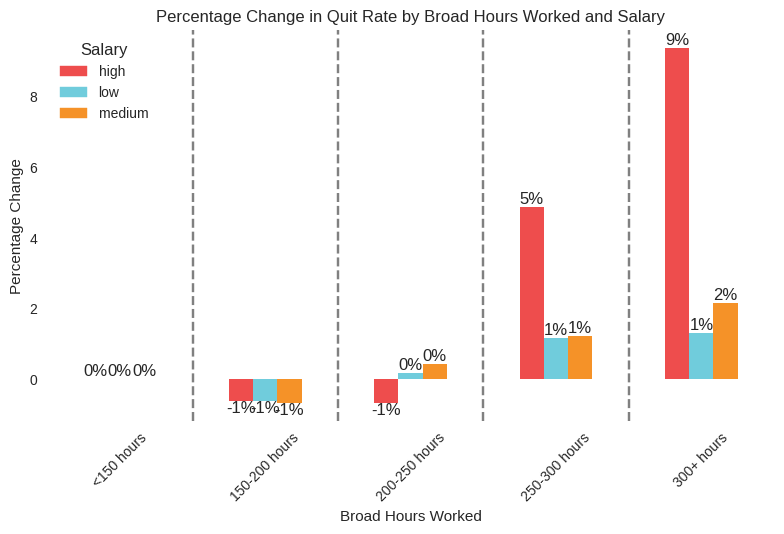

In [77]:
# @title
# Group Data by Broad Time Spent Categories
employee_eval['broad_hours_worked'] = pd.cut(employee_eval['average_montly_hours'], bins=[0, 150, 200, 250, 300, np.inf], labels=['<150 hours', '150-200 hours', '200-250 hours', '250-300 hours', '300+ hours'])
grouped_data = employee_eval.groupby(['broad_hours_worked', 'salary'])

# Calculate Quit Rate within Bins of Hours Worked
quit_rate = grouped_data['quit'].mean() * 100  # Convert to percentage

# Compute Percentage Change
percentage_change = quit_rate.unstack().pct_change()

# Plot the percentage change with assigned colors
plt.figure(figsize=(10, 6))
ax = percentage_change.plot(kind='bar', color=colors)

# Add vertical gridlines to separate time spent columns
for i in range(1, len(percentage_change)):
    ax.axvline(x=i - 0.5, color='gray', linestyle='--')

plt.title('Percentage Change in Quit Rate by Broad Hours Worked and Salary')
plt.xlabel('Broad Hours Worked')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.grid(axis='y')
#plt.grid(False)
# Create custom legend handles with corresponding colors
legend_handles = [
    mpatches.Patch(color=color, label=label) for color, label in zip(colors, percentage_change.columns)
]
plt.legend(handles=legend_handles, title='Salary')

# Add annotations to the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.f%%', label_type='edge')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

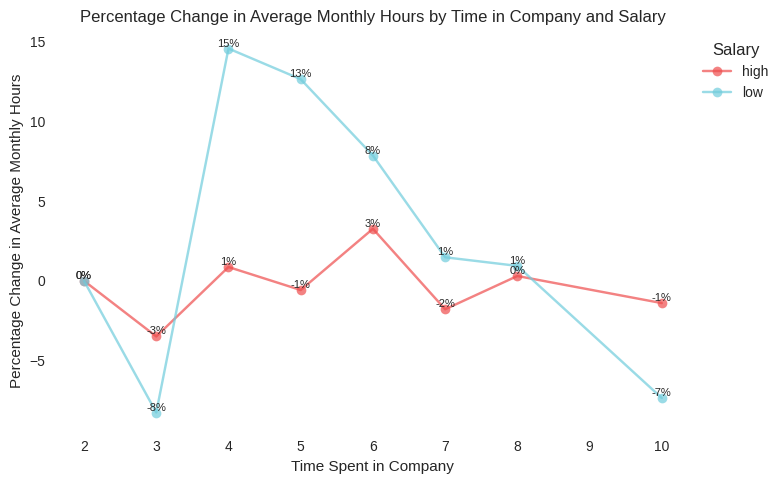

In [78]:
# @title
# Define the  salary categories corresponding colors

colors = ['#ee4d4d','#70ccdc']  #  'high' 'low' on a check

# Filter out the rows with 'low' salary
employee_eval_filtered_med = employee_eval[employee_eval['salary'] != 'medium']

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval_filtered_med.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Calculate the percentage change in average monthly hours relative to the initial value for each salary category
percent_change = df_grouped.apply(lambda x: (x - x.iloc[0]) / x.iloc[0] * 100, axis=0)

# Plot the line chart
fig, ax = plt.subplots(figsize=(8, 5))
percent_change.plot(ax=ax, marker='o',alpha=0.7, color=colors)

# Add labels for percentage change at each point
for time in percent_change.index:
    for salary, change in percent_change.loc[time].items():
        ax.text(time, percent_change.loc[time, salary], f'{change:.0f}%', fontsize=8, ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Time Spent in Company')
ax.set_ylabel('Percentage Change in Average Monthly Hours')
ax.set_title('Percentage Change in Average Monthly Hours by Time in Company and Salary')

# Add legend outside the plot
ax.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


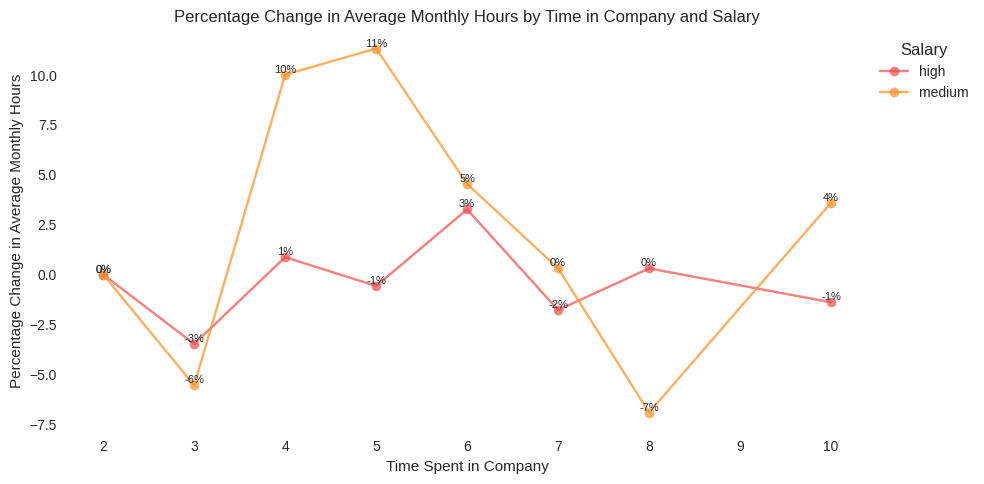

In [79]:
# @title
# Define the  salary categories corresponding colors

colors = ['#ee4d4d','#f59228']  #  'high' 'medium' on a check

# Filter out the rows with 'low' salary
employee_eval_filtered_low = employee_eval[employee_eval['salary'] != 'low']

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval_filtered_low.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Calculate the percentage change in average monthly hours relative to the initial value for each salary category
percent_change = df_grouped.apply(lambda x: (x - x.iloc[0]) / x.iloc[0] * 100, axis=0)

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 5))
percent_change.plot(ax=ax, marker='o',alpha=0.7, color=colors)

# Add labels for percentage change at each point
for time in percent_change.index:
    for salary, change in percent_change.loc[time].items():
        ax.text(time, percent_change.loc[time, salary], f'{change:.0f}%', fontsize=8, ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Time Spent in Company')
ax.set_ylabel('Percentage Change in Average Monthly Hours')
ax.set_title('Percentage Change in Average Monthly Hours by Time in Company and Salary')

# Add legend outside the plot
ax.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

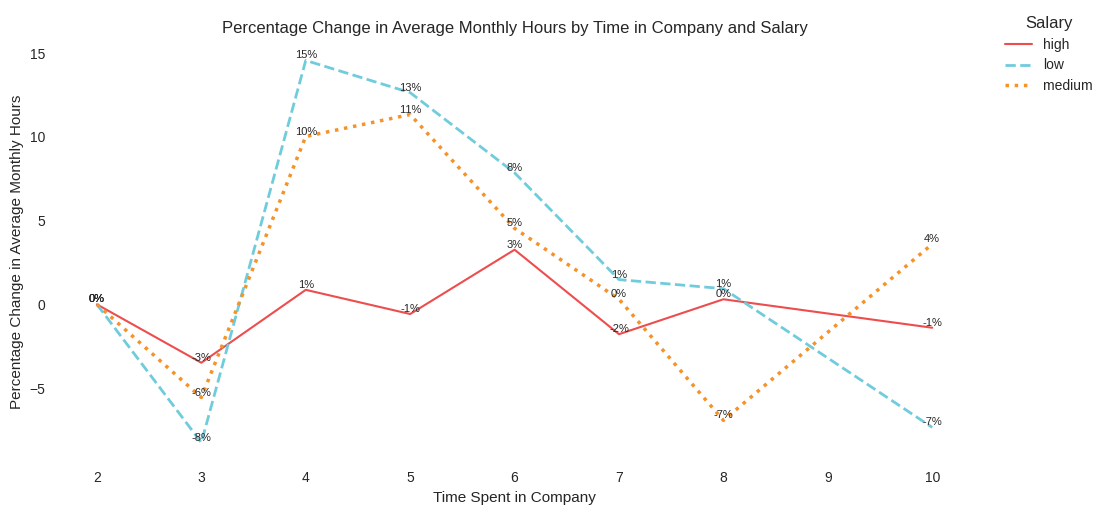

In [80]:
# @title
# Define salary categories corresponding colors
colors = ['#ee4d4d', '#70ccdc', '#f59228']

# Function to plot series with varied size and shape
def _plot_series_with_varied_style(series, series_name, palette, ax, line_width, line_style):
    xs = series.index
    ys = series.values
    ax.plot(xs, ys, label=series_name, color=palette, linewidth=line_width, linestyle=line_style)

# Group by salary and time spent in company, then calculate the average monthly hours
df_grouped = employee_eval.groupby(['time_spend_company', 'salary'])['average_montly_hours'].mean().unstack()

# Calculate the percentage change in average monthly hours relative to the initial value for each salary category
percent_change = df_grouped.apply(lambda x: (x - x.iloc[0]) / x.iloc[0] * 100, axis=0)

# Create a constrained layout figure
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Convert the colormap to a list of colors
colors2 = list(colors)

# Plot each series lines with varied size and shape
line_styles = ['solid', 'dashed', 'dotted']  # Define line styles
for i, (series_name, series) in enumerate(percent_change.items()):
    line_width = 1.5 + i * 0.5  # Vary line width
    line_style = line_styles[i % len(line_styles)]  # Cycle through line styles
    _plot_series_with_varied_style(series, series_name, colors2[i], ax, line_width, line_style)

# Add labels for percentage change at each point
for time in percent_change.index:
    for salary, change in percent_change.loc[time].items():
        ax.text(time, percent_change.loc[time, salary], f'{change:.0f}%', fontsize=8, ha='center', va='bottom')


# Add legend outside the loop
fig.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Set axis labels
plt.xlabel('Time Spent in Company')
plt.ylabel('Percentage Change in Average Monthly Hours')
plt.title('Percentage Change in Average Monthly Hours by Time in Company and Salary')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

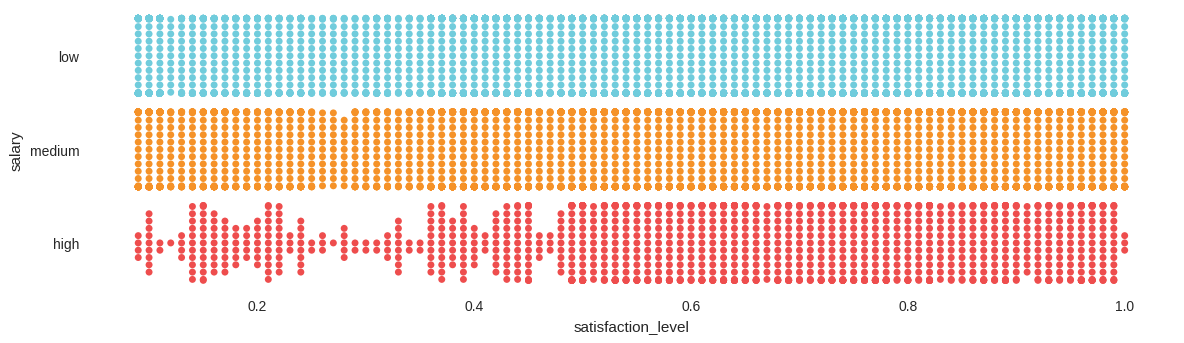

In [81]:
# @title
# Create a constrained layout figure
figsize = (12, 1.2 * len(employee_eval['salary'].unique()))

plt.figure(figsize=figsize)
sns.swarmplot(data=employee_eval, x='satisfaction_level', y='salary', palette=kats)
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

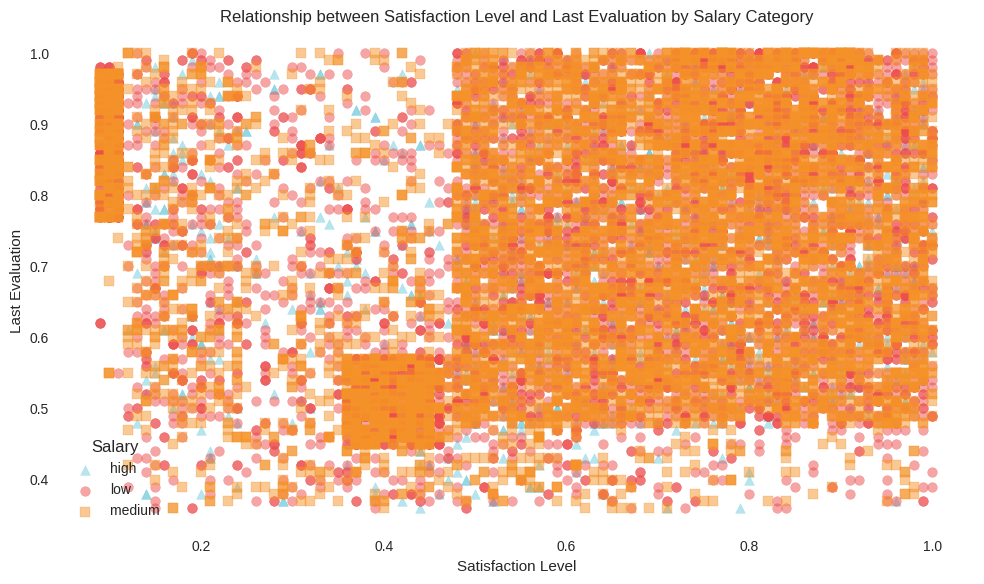

In [82]:
# @title

# Define a dictionary mapping salary categories to markers
salary_markers = {
    'low': 'o',
    'medium': 's',
    'high': '^'
}

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over each salary category and plot the corresponding points
for salary, group in employee_eval.groupby('salary'):
    plt.scatter(group['satisfaction_level'], group['last_evaluation'], label=salary, marker=salary_markers[salary], color=salary_colors[salary], alpha=0.5)

# Set labels and title
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Relationship between Satisfaction Level and Last Evaluation by Salary Category')

# Add legend
plt.legend(title='Salary')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

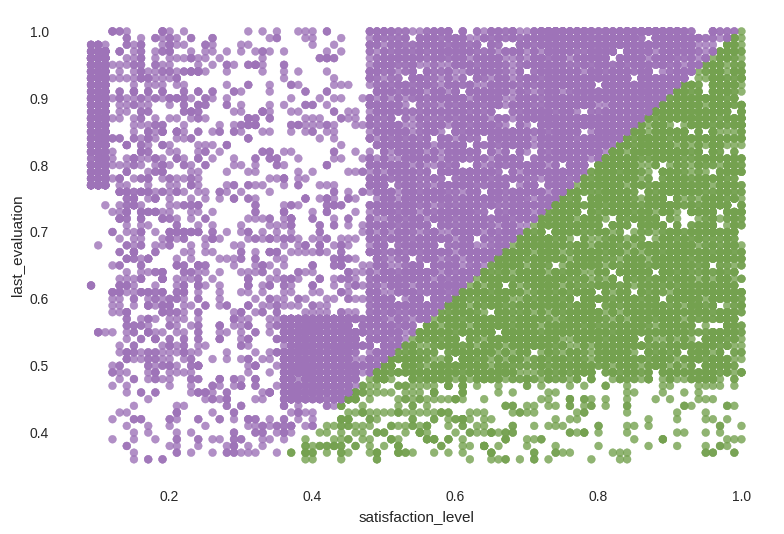

In [83]:
# @title


colors3 = ['#9e73b8' if x < y else '#74a14f' for x, y in zip(employee_eval['satisfaction_level'], employee_eval['last_evaluation'])]
employee_eval.plot(kind='scatter', x='satisfaction_level', y='last_evaluation', s=32, alpha=.8, c=colors3)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


>>Each point on the scatter plot represents an employee's satisfaction_level (on the x-axis) and last_evaluation (on the y-axis).
The points are colored based on the conditional statement: green if the satisfaction level is lower than the last evaluation, and purple otherwise.
By looking at the distribution of points and their colors, you can infer the relationship between satisfaction_level and last_evaluation. For example:
If there are many green points (lower satisfaction with higher evaluation), it suggests that there might be dissatisfaction among employees who are evaluated highly.
Conversely, if there are many purple points (higher satisfaction with higher evaluation), it indicates that employees tend to be satisfied with their work when their evaluations are high.
The scatter plot helps visualize the overall pattern and any potential outliers or clusters in the data.
In summary, the scatter plot with conditional coloring provides insight into the relationship between employee satisfaction levels and their last evaluations, allowing you to identify trends and patterns in the data.

In [84]:
# @title
employee_eval.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary', 'broad_time_spent',
       'broad_hours_worked'],
      dtype='object')

In [85]:
# @title
# plt.rcParams['figure.figsize'] = (12,8)

<Figure size 1000x600 with 0 Axes>

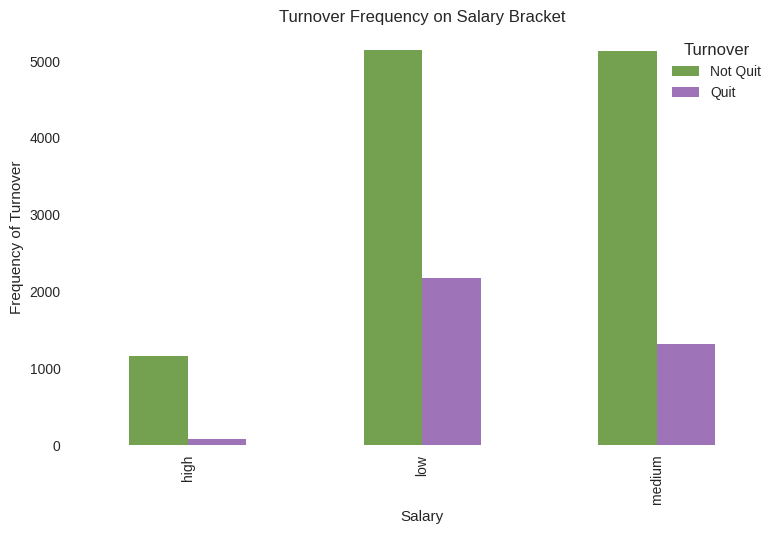

In [86]:
# @title
colors3 = ['#74a14f','#9e73b8']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart using crosstab with specified colors
ct = pd.crosstab(employee_eval.salary, employee_eval.quit)
ct.plot(kind='bar', color=colors3)

# Set labels and title
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')

# Add legend
plt.legend(['Not Quit', 'Quit'], title='Turnover')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

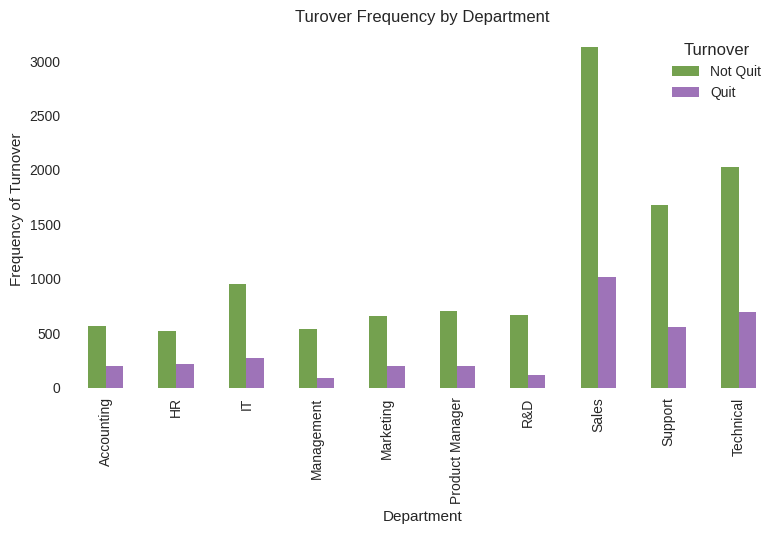

In [87]:
# @title
#colors3 = ['#74a14f','#9e73b8']
pd.crosstab(employee_eval.department, employee_eval.quit).plot(kind='bar',color=colors3)
plt.title('Turover Frequency by Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
# Add legend
plt.legend(['Not Quit', 'Quit'], title='Turnover')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

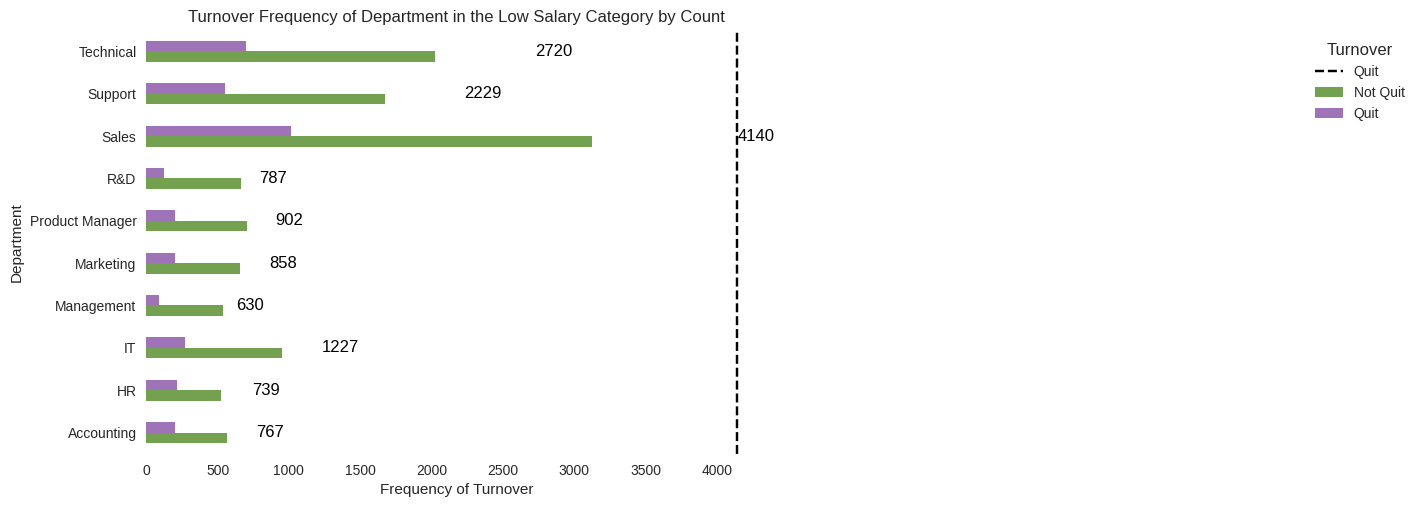

In [88]:
# @title
#employee_eval_low_salary=
# Calculate the total turnover frequency by department
total_turnover = pd.crosstab(employee_eval['department'], employee_eval['quit']).sum(axis=1)

# Plot the turnover frequency by department
ax = pd.crosstab(employee_eval['department'], employee_eval['quit']).plot(kind='barh', color=colors3)

# Add a line for the largest amount
largest_amount = total_turnover.max()
ax.axvline(x=largest_amount, color='black', linestyle='--')

# Annotate the bars with the amounts
for i, v in enumerate(total_turnover):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Set title and labels
plt.title('Turnover Frequency of Department in the Low Salary Category by Count')
plt.xlabel('Frequency of Turnover')
plt.ylabel('Department')


# Add legend
plt.legend(['Quit', 'Not Quit', 'Quit'], title='Turnover', bbox_to_anchor=(2.05, 1), loc='upper right')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


categorizing the variables.

This bar chart provides a straightforward representation of turnover frequency in each department for employees with low salary, allowing quick comparison between departments in terms of employee retention.

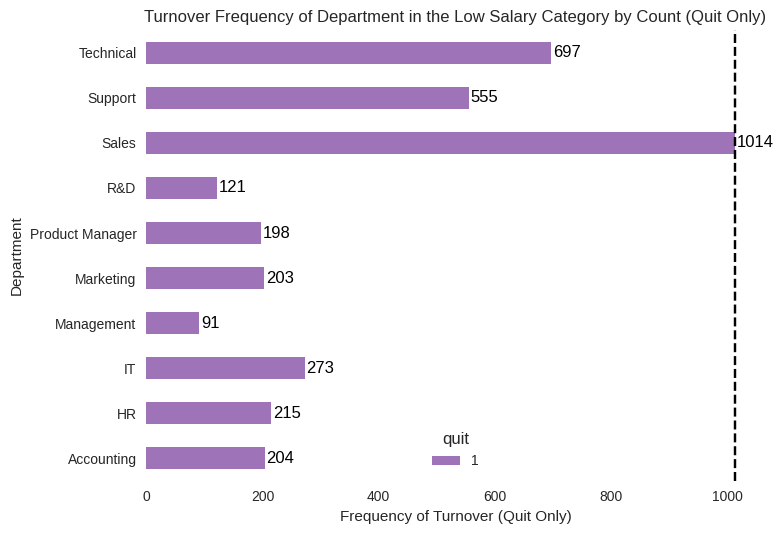

In [89]:
# @title
quit_color = ['#9e73b8']
# Filter the data to include only the rows with non-zero values in the 'quit' column
non_zero_quit_values = employee_eval[employee_eval['quit'] > 0]

# Calculate the total turnover frequency by department for non-zero 'quit' values
total_turnover_quit = pd.crosstab(non_zero_quit_values['department'], non_zero_quit_values['quit']).sum(axis=1)

# Plot the turnover frequency by department for non-zero 'quit' values
ax = pd.crosstab(non_zero_quit_values['department'], non_zero_quit_values['quit']).plot(kind='barh', color=quit_color)

# Add a line for the largest amount
largest_amount_quit = total_turnover_quit.max()
ax.axvline(x=largest_amount_quit, color='black', linestyle='--')

# Annotate the bars with the amounts
for i, v in enumerate(total_turnover_quit):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Set title and labels
plt.title('Turnover Frequency of Department in the Low Salary Category by Count (Quit Only)')
plt.xlabel('Frequency of Turnover (Quit Only)')
plt.ylabel('Department')

# # Add legend
# plt.legend(['Quit', 'Quit'], title='Turnover', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


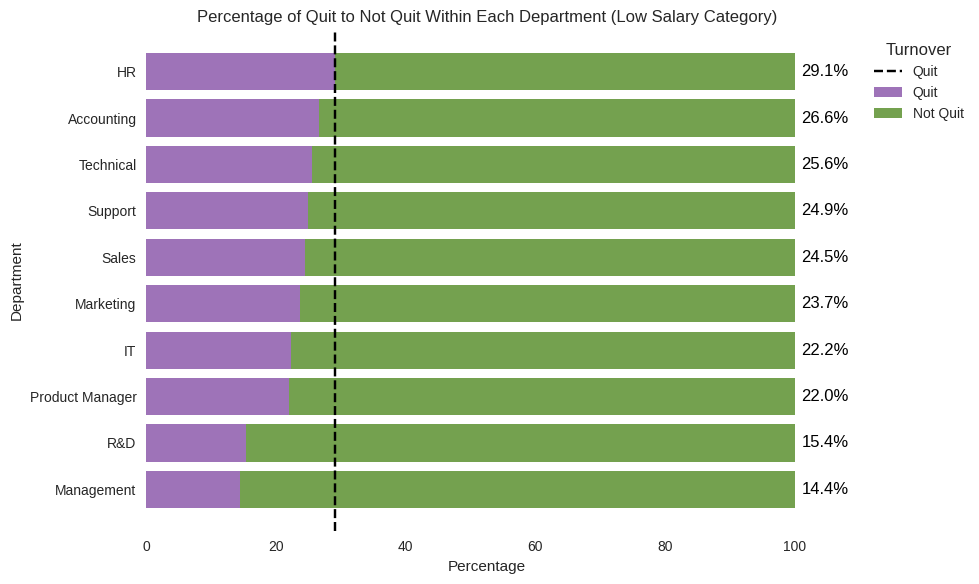

In [90]:
# @title
# Calculate the total number of employees by department
total_employees_by_department = employee_eval.groupby('department').size()

# Calculate the number of employees who quit and who did not quit by department
quit_by_department = employee_eval.groupby('department')['quit'].sum()
not_quit_by_department = total_employees_by_department - quit_by_department

# Calculate the percentage of quit and not quit values for each department
percent_quit = (quit_by_department / total_employees_by_department) * 100
percent_not_quit = (not_quit_by_department / total_employees_by_department) * 100

# Combine the percentages into a DataFrame for sorting
percentage_df = pd.DataFrame({'Quit': percent_quit, 'Not Quit': percent_not_quit})

# Sort the DataFrame by the percentage of quit in descending order
percentage_df_sorted = percentage_df.sort_values(by='Quit', ascending=True)

# Plot the percentage of quit and not quit within each department
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the percentage of quit
ax.barh(percentage_df_sorted.index, percentage_df_sorted['Quit'], color=colors3[1])

# Plot the percentage of not quit
ax.barh(percentage_df_sorted.index, percentage_df_sorted['Not Quit'], left=percentage_df_sorted['Quit'], color=colors3[0])

# Add a line for the largest percentage
largest_percent = percentage_df_sorted['Quit'].max()
ax.axvline(x=largest_percent, color='black', linestyle='--')

# Annotate the bars with the percentages
for department, percent_q, percent_nq in zip(percentage_df_sorted.index, percentage_df_sorted['Quit'], percentage_df_sorted['Not Quit']):
    ax.text(percent_q + percent_nq + 1, department, f'{percent_q:.1f}%', color='black', va='center')

# Set title and labels
plt.title('Percentage of Quit to Not Quit Within Each Department (Low Salary Category)')
plt.xlabel('Percentage')
plt.ylabel('Department')

# Add legend
plt.legend(['Quit', 'Quit', 'Not Quit'], title='Turnover', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

the turnover frequency on departments for employees with a low salary category:
>*  Y-Axis (Frequency of Turnover): The height of each bar represents the turnover frequency within each department. It indicates the percentage of employees who have quit relative to the total number of employees in that department.

>*  Bar Colors: Each bar is divided into two segments: one segment represents the percentage of employees who have not quit (stayed), and the other segment represents the percentage of employees who have quit. These segments are color-coded, with green typically representing employees who stayed and purple representing employees who quit.

>*  Legend: The legend on the right side of the plot explains the color-coding of the bars. It indicates which color corresponds to employees who stayed and which color corresponds to employees who quit.

>*  Annotations: Above each bar, there is an annotation showing the percentage of employees who quit within that department. This provides a quick glance at the turnover rate for each department.

By examining the bars, you can identify departments with high turnover rates (where the purple segment is relatively larger) and those with low turnover rates. Additionally, you can compare turnover rates across different departments to identify potential areas of concern or areas where retention strategies may be effective.

In [113]:
# @title
# Verify Data Integrity
missing_values = employee_eval[['average_montly_hours', 'salary']].isnull().sum()
print("Missing Values:")
print(missing_values)

# Group Data Appropriately
grouped_data = employee_eval.groupby(['time_spend_company', 'salary'])

# Calculate Average Monthly Hours
average_hours = grouped_data['average_montly_hours'].mean()


Missing Values:
average_montly_hours    0
salary                  0
dtype: int64


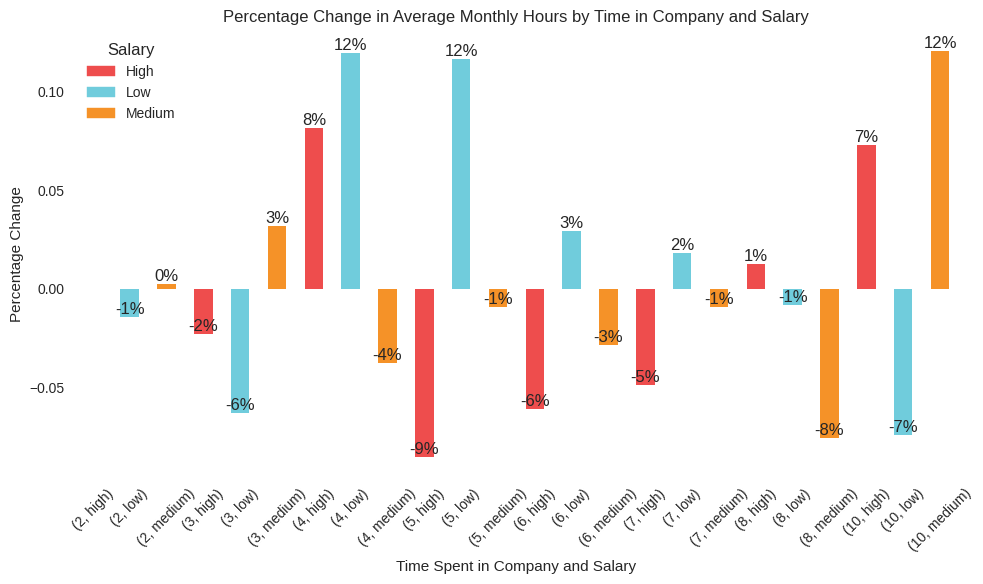

In [92]:
# @title
# Group Data Appropriately
grouped_data = employee_eval.groupby(['time_spend_company', 'salary'])

# Calculate Average Monthly Hours
average_hours = grouped_data['average_montly_hours'].mean()

# Compute Percentage Change
percentage_change = average_hours.pct_change()

# Plot the percentage change with assigned colors
plt.figure(figsize=(10, 6))
percentage_change.plot(kind='bar', color=colors2)
plt.title('Percentage Change in Average Monthly Hours by Time in Company and Salary')
plt.xlabel('Time Spent in Company and Salary')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add annotations to the bars
for i, value in enumerate(percentage_change):
    plt.annotate(f'{value:.0%}', xy=(i, value), ha='center', va='bottom')
plt.tight_layout()

# Add legend for salary colors
handles = [mpatches.Patch(color=color, label=label) for label, color in zip(['High', 'Low', 'Medium'], colors2)]
plt.legend(handles=handles, title='Salary')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

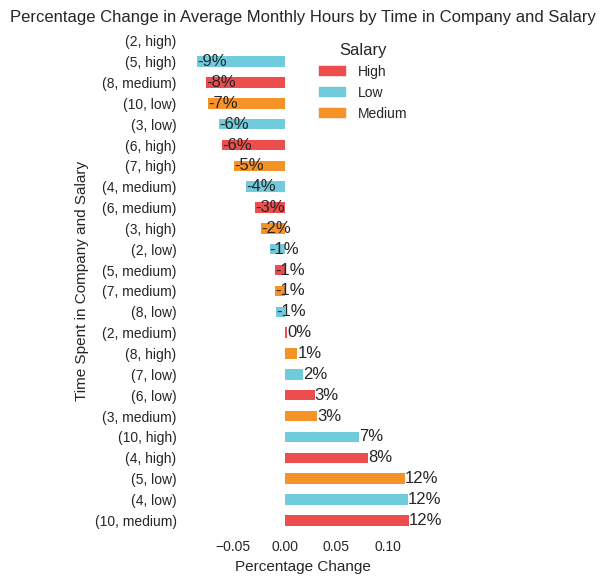

In [93]:
# @title
# Sort the percentage change in descending order
percentage_change_sorted = percentage_change.sort_values(ascending=False)

# Plot the percentage change with assigned colors
plt.figure(figsize=(4, 6))
percentage_change_sorted.plot(kind='barh', color=colors2)  # Changed 'bar' to 'barh'
plt.title('Percentage Change in Average Monthly Hours by Time in Company and Salary')
plt.ylabel('Time Spent in Company and Salary')  # Changed from xlabel to ylabel
plt.xlabel('Percentage Change')  # Changed from ylabel to xlabel
plt.grid(axis='x')  # Changed 'y' to 'x' for vertical plot

# Add annotations to the bars
for i, value in enumerate(percentage_change_sorted):
    plt.annotate(f'{value:.0%}', xy=(value, i), va='center')  # Flipped x and y coordinates

# Add legend for salary colors
handles = [mpatches.Patch(color=color, label=label) for label, color in zip(['High', 'Low', 'Medium'], colors2)]
plt.legend(handles=handles, title='Salary')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

In [94]:
# @title
# finding a better way...need to limit the data to the top hours by time and salary first
 # Set the figure size
# plt.figure(figsize=(10, 6))

# # Plot the barplot
# sns.barplot(data=employee_eval, x='percentage_change', y='time_spend_company', hue='salary', ci='sd', palette=colors2)

# # Set the title and labels
# plt.title('Percentage Change in Average Monthly Hours by Time in Company and Salary')
# plt.xlabel('Percentage Change')
# plt.ylabel('Time Spent in Company')
# plt.grid(axis='x')

# # Remove spines
# sns.despine()

# # Show the plot
# plt.tight_layout()
# plt.show()


the above shows the same chart as the previous but is in a more minimals style

In [97]:
# @title
print(percent_quit)

department
Accounting         26.597132
HR                 29.093369
IT                 22.249389
Management         14.444444
Marketing          23.659674
Product Manager    21.951220
R&D                15.374841
Sales              24.492754
Support            24.899058
Technical          25.625000
dtype: float64


In [98]:
# @title
# # @title
# cat_vars = ['department', 'salary']
# for var in cat_vars:
#   cat_list = pd.get_dummies(employee_eval[var], prefix=var)
#   employee_eval = employee_eval.join(cat_list)

In [114]:
# @title
employee_eval.drop(columns = ['department', 'salary'], axis = 1, inplace = True)

In [115]:
# @title
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [116]:
# @title
employee_eval.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years'],
      dtype='object')

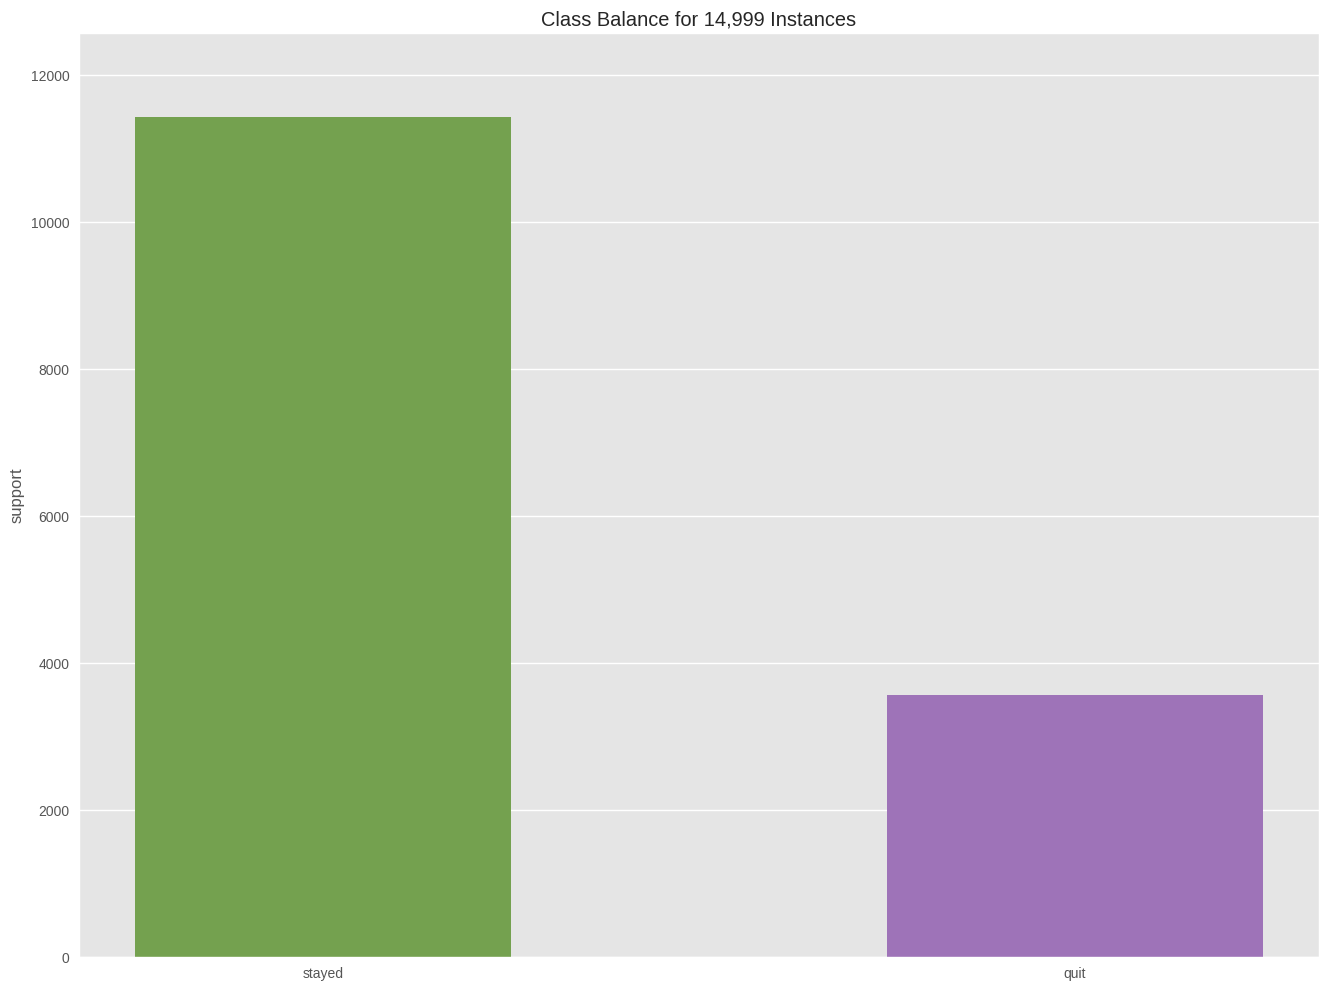

<Axes: title={'center': 'Class Balance for 14,999 Instances'}, ylabel='support'>

In [117]:
# @title
from yellowbrick.target import ClassBalance
colors3 = ['#74a14f', '#9e73b8']
visualizer = ClassBalance(labels=['stayed', 'quit'], colors=colors3)

# Fit the visualizer on your target variable
visualizer.fit(employee_eval.quit)

# Show the visualizer
visualizer.show()

In [118]:
# @title
X = employee_eval.loc[:, employee_eval.columns != 'quit']
y = employee_eval.quit

In [119]:
# @title
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)

## Build an Interactive Decision Tree Classifier

Supervised learning:
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$


- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$


About:

 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption

- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.


#### Decision trees: partitioning the feature space:

- Decision trees generally have low bias but have high variance.

In [120]:
# @title
# Decision Tree function
@interact
def plot_tree(crit=['gini', 'entropy'],
              split=['best', 'random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

  estimator = DecisionTreeClassifier(random_state=0, criterion=crit, splitter=split, max_depth=depth,
                                     min_samples_split = min_split,  min_samples_leaf = min_leaf)

  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))

  graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=X_train.columns,
                                      class_names = ['stayed', 'quit'], filled = True))

  display(Image(graph.pipe(format='png')))

  return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Build an Interactive Random Forest Classifier

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [121]:
# @title
# Random Forest function
@interact
def plot_tree_rf(crit=['gini', 'entropy'],
                 bootstrap=[True, False],  # Changed to boolean values
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

  estimator = RandomForestClassifier(random_state=1, criterion=crit, bootstrap=bootstrap,
                                     n_estimators=forests, max_depth=depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf,
                                     n_jobs= -1, verbose = False)
  estimator.fit(X_train, y_train)

  print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Random Forests Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
  num_tree = estimator.estimators_[0]
  print('\Visualizing Tree: ', 0)


  graph = Source(tree.export_graphviz(num_tree, out_file = None, feature_names = X_train.columns,
                                      class_names = ['stayed', 'quit'], filled = True))

  display(Image(graph.pipe(format='png')))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Feature Importance and Evaluation Metrics

In [122]:
# @title
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (16,12)
plt.style.use("ggplot")

<Axes: title={'center': 'Feature Importances of 7 Features using RandomForestClassifier'}, xlabel='relative importance'>

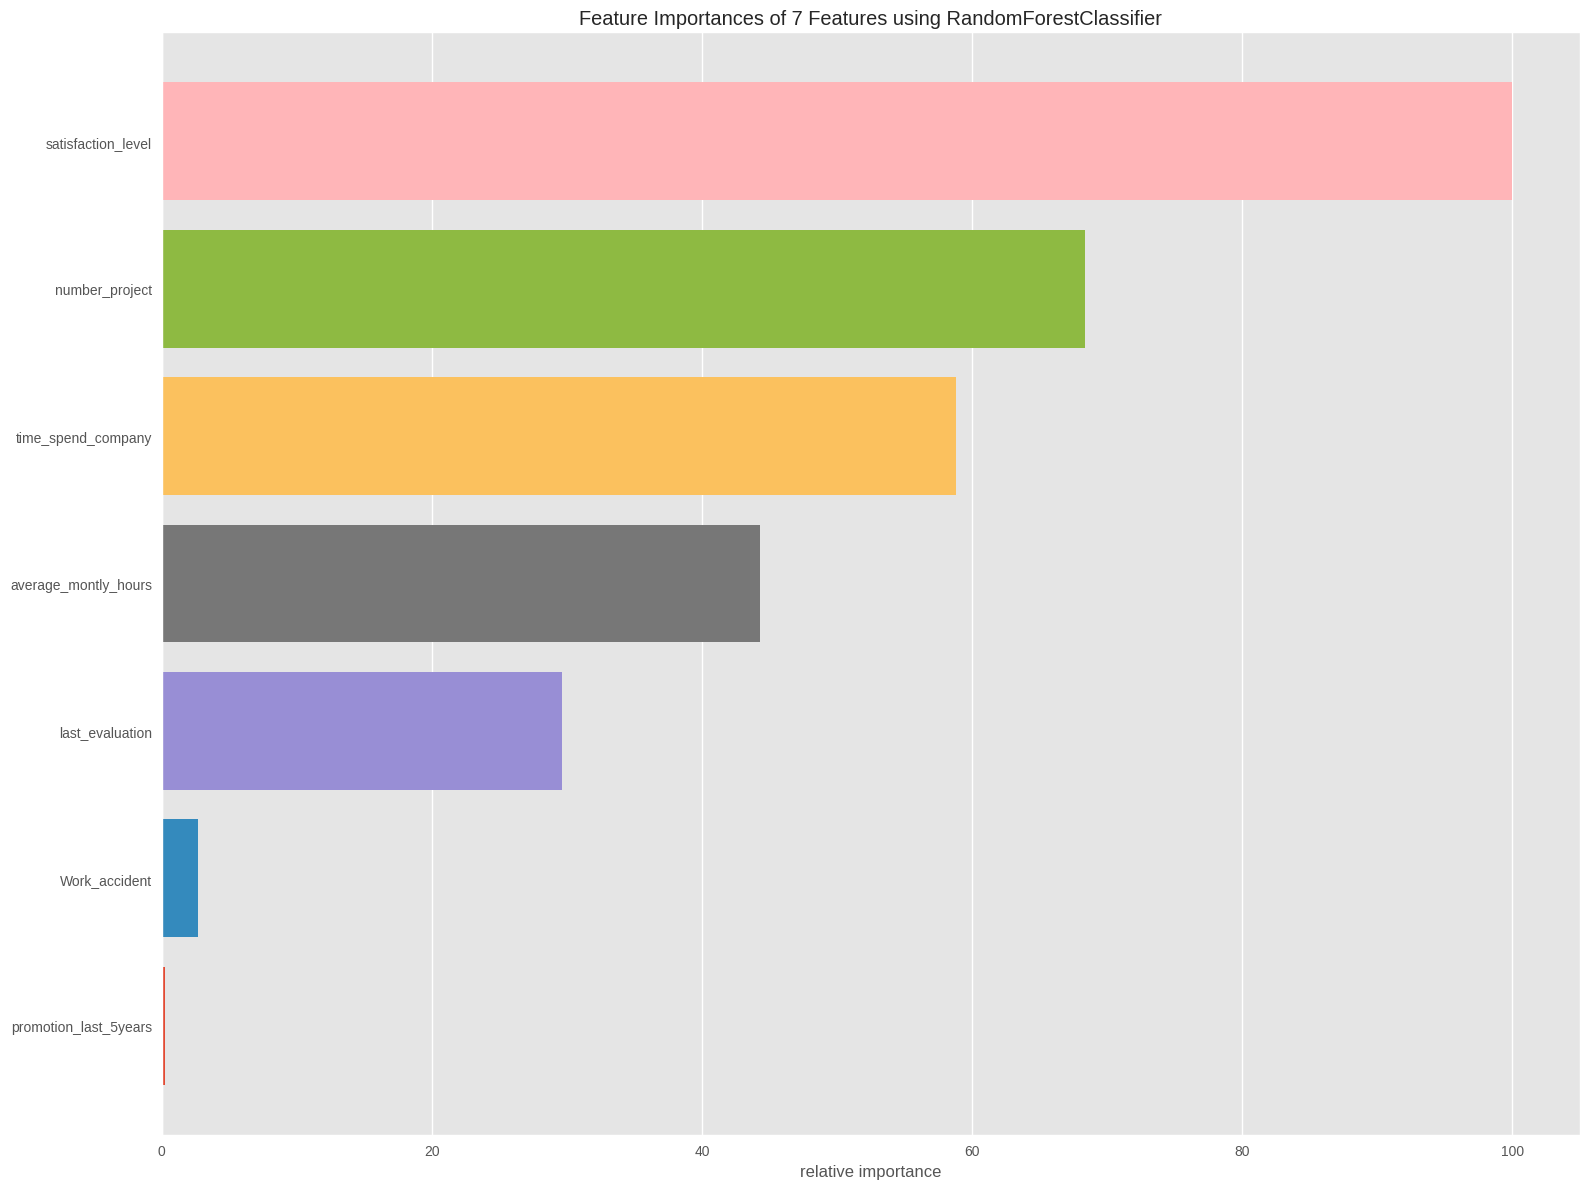

In [123]:
# @title
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(
    bootstrap=True,  # Corrected parameter
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=5,
    max_features='auto',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=-1,
    oob_score=False,
    random_state=1,
    warm_start=False
)

# Instantiate and fit the FeatureImportances visualizer
viz = FeatureImportances(rf)
viz.fit(X_train, y_train)

# Show the feature importances plot and save it to a file
viz.show(outpath="1.png")

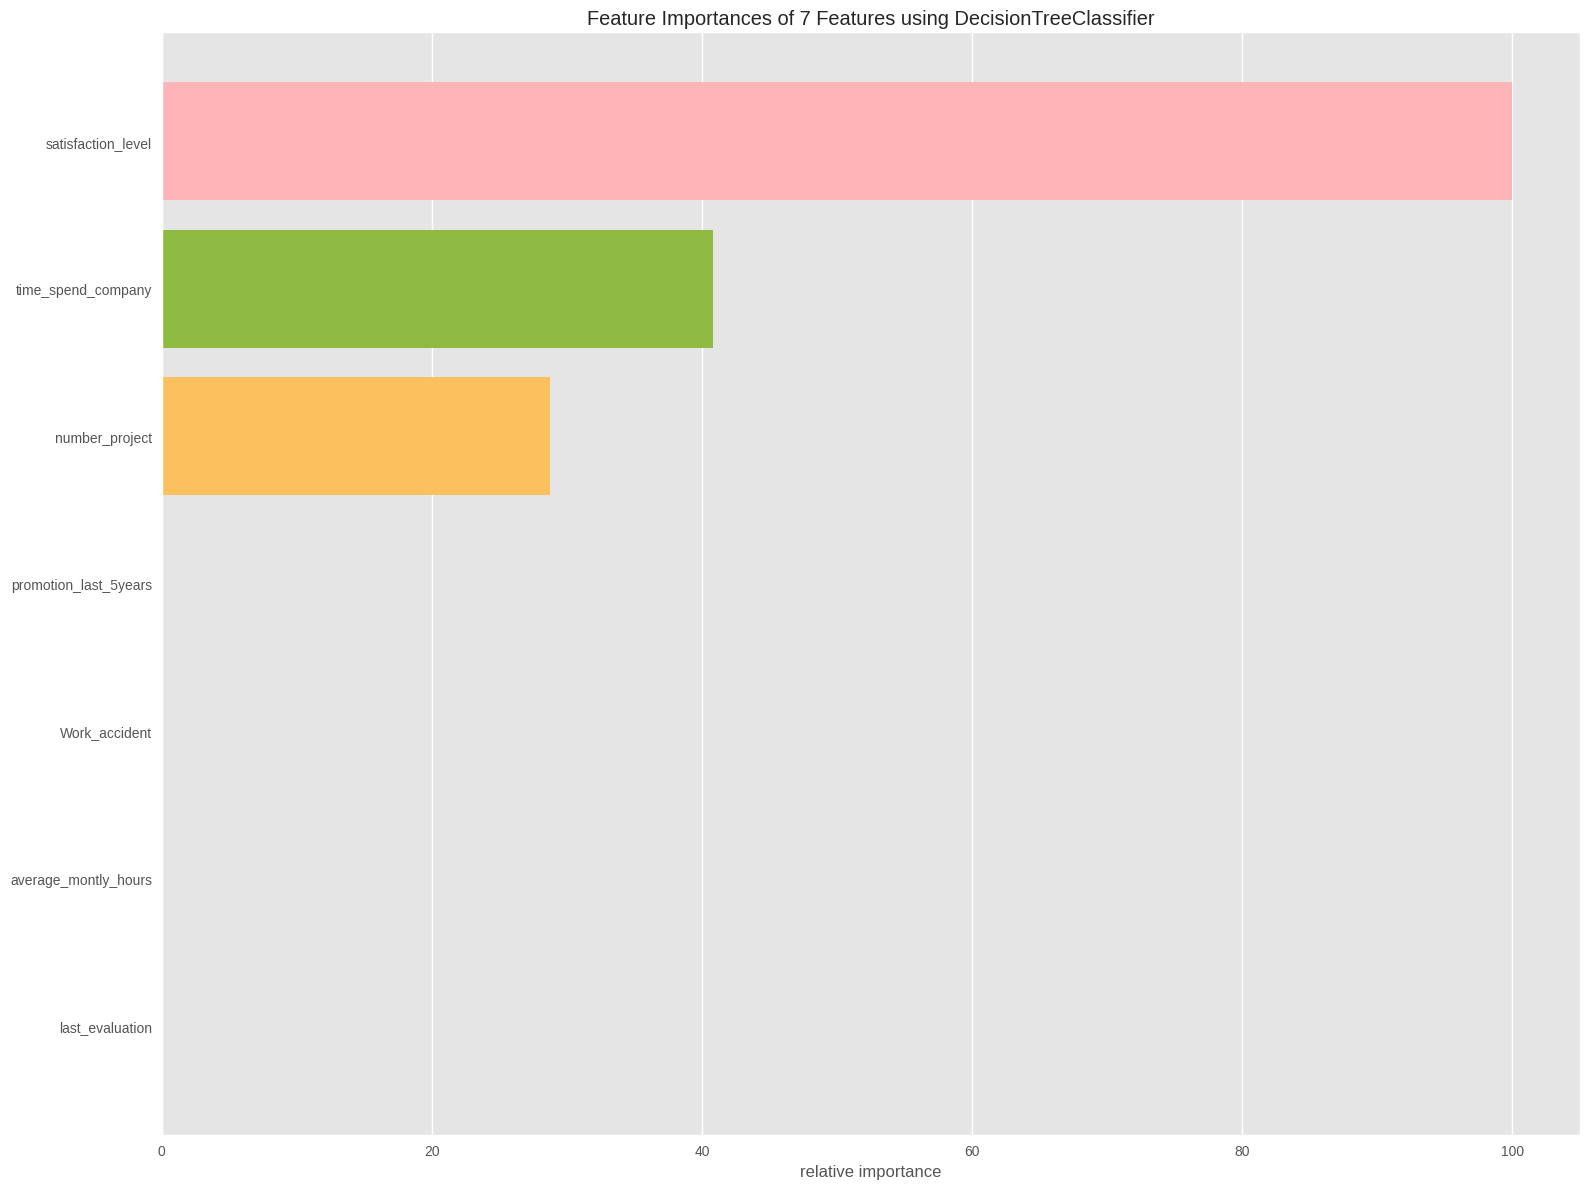

<Axes: title={'center': 'Feature Importances of 7 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [124]:
# @title
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show()